In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load and Visualize CIFAR-10 Dataset

In [2]:
import os, pickle

def load_cifar10_batch(batch_filename):
    with open(batch_filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
        Y = np.array(Y)
    return X, Y

def load_cifar10(path):
    xs = []
    ys = []
    
    for i in range(1, 6):
        batch_filename = os.path.join(path, 'data_batch_%d' % i)
        X, Y = load_cifar10_batch(batch_filename)
        xs.append(X)
        ys.append(Y)
    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    
    Xte, Yte = load_cifar10_batch(os.path.join(path, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [3]:
X_train, y_train, X_test, y_test = load_cifar10('datasets/cifar-10-batches-py')

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

X_train = X_train.reshape((n_train, -1))
X_test = X_test.reshape((n_test, -1))

print(X_train.shape)
print(X_test.shape)

(50000, 3072)
(10000, 3072)


# Preprocess Data

In [5]:
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)

X_train -= mu
X_train /= sigma
X_test -= mu
X_test /= sigma

# print(np.mean(X_train, axis=0))
# print(np.std(X_train, axis=1))

# Using `sklearn` to classify data

In [6]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(verbose=True, early_stopping=True)

In [7]:
clf.fit(X_train, y_train)

Iteration 1, loss = 1.83702808
Validation score: 0.453600
Iteration 2, loss = 1.53337027
Validation score: 0.454400
Iteration 3, loss = 1.42967330
Validation score: 0.488600
Iteration 4, loss = 1.33555867
Validation score: 0.493200
Iteration 5, loss = 1.28287133
Validation score: 0.494000
Iteration 6, loss = 1.23144580
Validation score: 0.502000
Iteration 7, loss = 1.19861102
Validation score: 0.505800
Iteration 8, loss = 1.16520731
Validation score: 0.506200
Iteration 9, loss = 1.13909833
Validation score: 0.516800
Iteration 10, loss = 1.10858868
Validation score: 0.510600
Iteration 11, loss = 1.09278079
Validation score: 0.501800
Iteration 12, loss = 1.06942549
Validation score: 0.502400
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)


print("Accuracy on Train data = %.2f" % train_accuracy)
print("Accuracy on Test data = %.2f" % test_accuracy)

Accuracy on Train data = 0.63
Accuracy on Test data = 0.50


In [10]:
print(confusion_matrix(y_test, y_pred))

[[546  40  58  28  32  14  16  32 141  93]
 [ 59 586  20  22  13  11  20  10  58 201]
 [ 81  25 372  83 173  76  85  54  21  30]
 [ 39  18  83 326  89 210 109  51  25  50]
 [ 50  18 110  53 470  62  94  85  32  26]
 [ 23  13  83 188  80 416  74  62  28  33]
 [ 16  23  62 109 136  62 535  17  17  23]
 [ 41  18  43  55 115  88  26 536  13  65]
 [ 96  76  17  21  15  22   7   7 624 115]
 [ 32 167  16  38  14  19  18  37  48 611]]


## Fine Tune Hyper-Parameters 

In [11]:
clf2 = MLPClassifier(hidden_layer_sizes=(500, 100), 
                     alpha=0.05, 
                     batch_size=2000,
                     solver='sgd',
                     learning_rate='adaptive', 
                     learning_rate_init=0.05,
                     early_stopping=True,
                     verbose=True)

In [12]:
clf2.fit(X_train, y_train)

Iteration 1, loss = 1.97957594
Validation score: 0.403800
Iteration 2, loss = 1.61555603
Validation score: 0.440200
Iteration 3, loss = 1.49154084
Validation score: 0.465600
Iteration 4, loss = 1.39827791
Validation score: 0.472800
Iteration 5, loss = 1.32467804
Validation score: 0.507800
Iteration 6, loss = 1.24487169
Validation score: 0.502600
Iteration 7, loss = 1.19452623
Validation score: 0.509200
Iteration 8, loss = 1.13858706
Validation score: 0.519200
Iteration 9, loss = 1.08943093
Validation score: 0.525200
Iteration 10, loss = 1.03576370
Validation score: 0.521400
Iteration 11, loss = 0.98877721
Validation score: 0.513000
Iteration 12, loss = 0.92409822
Validation score: 0.514200
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.010000
Iteration 13, loss = 0.82818505
Validation score: 0.541400
Iteration 14, loss = 0.74722923
Validation score: 0.542400
Iteration 15, loss = 0.71682521
Validation score: 0.541400
Iterat

MLPClassifier(activation='relu', alpha=0.05, batch_size=2000, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(500, 100), learning_rate='adaptive',
       learning_rate_init=0.05, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [13]:
y_pred = clf2.predict(X_test)

print("Accuracy on train data = %.2f" % accuracy_score(y_train, clf2.predict(X_train)))
print("Accuracy on test data  = %.2f" % accuracy_score(y_test, y_pred))

Accuracy on train data = 0.76
Accuracy on test data  = 0.54


## Results

### Correct predictions

In [15]:
X_test = sigma * X_test + mu

In [14]:
correct_idx = np.arange(10000)[y_test == y_pred]
print(correct_idx[:10])

[ 6  7  9 10 12 13 16 18 19 21]


In [16]:
correct_samples_idx = np.random.choice(correct_idx, 10, replace=False)

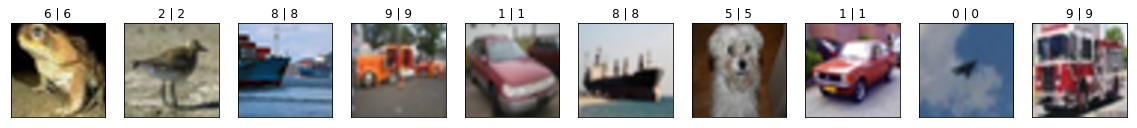

In [17]:
plt.figure(figsize=(20, 2))
for i, idx in enumerate(correct_samples_idx):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[idx].reshape(32, 32, 3).astype(np.uint8), interpolation='spline16')
    plt.title("%d | %d" % (y_test[idx], y_pred[idx]))
    plt.xticks([])
    plt.yticks([])

### incorrect predictions 

In [18]:
incorrect_idx = np.arange(10000)[y_test != y_pred]
incorrect_samples_idx = np.random.choice(incorrect_idx, 10, replace=False)

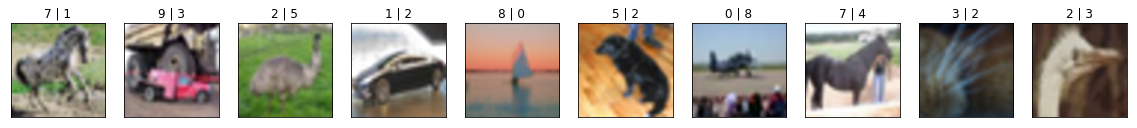

In [19]:
plt.figure(figsize=(20, 2))
for i, idx in enumerate(incorrect_samples_idx):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_test[idx].reshape(32, 32, 3).astype(np.uint8), interpolation='spline16')
    plt.title("%d | %d" % (y_test[idx], y_pred[idx]))
    plt.xticks([])
    plt.yticks([])